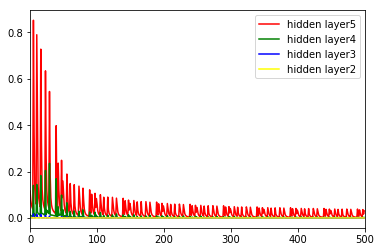

In [2]:
#--------------------------
# 说明：帮助大家理解反向传播时为什么出现梯度消失
#--------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator #导入matplotlib.ticker模块中的MultipleLocator,用于坐标轴上刻度线的定位以及刻度线标签格式化。
import xlrd     # 导入必备的 xlrd 库，目的是为了调用 xlrd.open_workbook 函数打开 excel 文件，读取数据

class Config:#创建congfig类
    input_dim = 2  # input layer dimensionality，输入数据维度为2
    output_dim = 1  # output layer dimensionality，输出维度为1
    # Gradient descent parameters (I picked these by hand)
    lr = 2  # learning rate for gradient descent，梯度下降时学习率为2
    reg_lambda = 0 #0.01  # regularization strength，正则化系数为0

# 定义函数loadData函数，输入参数是 filename 指代文件名，返回数据data，目的是从.xls文件中加载数据，并存储为numpy中的array格式
def loadData(filename):
    workbook = xlrd.open_workbook(filename)         # 通过调用 xlrd.open_workbook 函数打开 excel 文件，读取数据，并返回给 workbook 变量
    boyinfo = workbook.sheet_by_index(0)            # 通过使用属性 sheet_by_index 得到  excel 文件 中的工作簿，其中 sheet_by_index(0) 表示是第一个工作簿，在 python 中，下标从 0 开始
    col_num = boyinfo.ncols                         # 通过使用属性 ncols 得到 excel 文件 中第一个工作簿的 列数，并赋值给 col_num
    row_num = boyinfo.nrows                         # 通过使用属性 nrows 得到 excel 文件 中第一个工作簿的 行数，并赋值给 row_num
    col0 = boyinfo.col_values(0)[1:]                # 通过使用属性 col_values(0)[1:] 得到 excel 文件 中第一列数据中，从第2行到最后一行的所有数据，并赋值给 col0
    data = np.array(col0)                           # 通过使用 np.array 函数， 将 col0 转换成数组，并赋值给 data
    if col_num == 1:                                # 条件判断语句： 如果列数 col_num 为1， 只有一列，那么直接返回数据 data
        return data                                     # 返回data
    else:                                           # 否则，如果不止一列数据，需要遍历所有列的数据
        for i in range(col_num-1):                      # 通过使用for循环达到遍历的目的
            coltemp = boyinfo.col_values(i+1)[1:]           # 从第二行开始，表头不算，遍历从 第二列 开始到最后一列的数据
            data = np.c_[data, coltemp]                     # 通过使用 np.c_ 函数将 第一列的数据 和后面 所有列的数据组合起来，并赋值给 data
    return data                                     # 返回data


def normalization(X):#定义归一化函数
    mu = np.mean(X, axis=0)#求取一列数据的均值
    Xmin = np.min(X, axis=0)#求取一列数据的最小值
    Xmax = np.max(X, axis=0)#求取一列数据的最大值
    X_norm = (X-mu)/(Xmax-Xmin)  # 计算归一化后的数据，归一化公式为：(X-mu)/(Xmax-Xmin)，归一化后数据范围为 [-1,1]
    return X_norm  # 返回归一化后的数据 X_norm

def sigmoid(z):# 定义sigmoid函数
    g = 1 / (1 + np.exp(-z))#sigmoid函数实现，y=1/（1+e^-x）
    return g

def sigmoidGradient(z):#定义sigmoid函数求导的形式
    g = 1.0 / (1.0 + np.exp(-z))#sigmiod函数求导之后的形式为[1/（1+e^-x）][1-1/(1+e^-x)]
    g = g * (1 - g)
    return g


def train(X, y,iterNum=2000):#定义训练函数,默认训练2000次
    # Initialize the parameters to random values. We need to learn these.
    #对参数进行全一初始化，并在学习过程中对参数进行更新
    num = X.shape[0]#获取X的列数，即样本数
    X_m = np.transpose(X)#对X进行转置操作
	#设置每层权重的维度并初始化，可参考PPT
    W1 = np.array([1.0, 1.0])#将W1初始化为[1.0,1.0]
    b1 = np.array([1.0])#将其余参数初始化为[1.0]
    W2 = np.array([1.0])
    b2 = np.array([1.0])
    W3 = np.array([1.0])
    b3 = np.array([1.0])
    W4 = np.array([1.0])
    b4 = np.array([1.0])
    W5 = np.array([1.0])
    b5 = np.array([1.0])
    bigdelta5 = []#创建bigdelta5空列表储存DW5的绝对值
    bigdelta4 = []#创建bigdelta4空列表储存DW4的绝对值
    bigdelta3 = []#创建bigdelta3空列表储存DW3的绝对值
    bigdelta2 = []#创建bigdelta2空列表储存DW2的绝对值
    bigdelta1 = []#创建bigdelta1空列表储存DW1的绝对值

    x_axis = [] #创建x_axis空列表用以储存
    model = {}#创建model空字典用以储存更新后的参数
    # Gradient descent，梯度下降
    for j in range(0, iterNum):
        for i in range(0, num):
            # Forward propagation，前向传播
            a1 = np.reshape(X_m[:, i], (2, 1))#将X_m中的每列数据转化为2*1矩阵
            z2 = W1.dot(a1) + b1#a1与W1相乘，并加上偏置项，输出矩阵为1*1矩阵
            a2 = sigmoid(z2)#将z2带入sigmoid函数
            #以下直至a6的参数运算与a2,z2相同
            z3 = W2.dot(a2) + b2
            a3 = sigmoid(z3)
            z4 = W3.dot(a3) + b3
            a4 = sigmoid(z4)
            z5 = W4.dot(a4) + b4
            a5 = sigmoid(z5)
            z6 = W5.dot(a5) + b5
            a6 = sigmoid(z6)


            # Back propagation
            #反向传播
            #y_m = np.transpose(np.reshape(y, [-1, 1])) #reshape y_m from (n,)to (1,n)
            #y_m为n*1的矩阵，将其转置为1*n的矩阵
            delta6 = a6-y[i]#delta6为第6层的“误差”
            delta5 = np.dot(W5.T, delta6) * sigmoidGradient(z5)#delta5为第5层的“误差”
            delta4 = np.dot(W4.T, delta5) * sigmoidGradient(z4)#delta4为第4层的“误差”
            delta3 = np.dot(W3.T, delta4) * sigmoidGradient(z3)#delta3为第3层的“误差”
            delta2 = np.dot(W2.T, delta3) * sigmoidGradient(z2)#delta2为第2层的“误差”

            DW5 = np.dot(delta6, a5.T)#DW5为损失函数对权重参数W5的偏导
            Db5 = np.sum(delta6)#Db5为损失函数对权重参数b5的偏导
            DW4 = np.dot(delta5, a4.T)#DW4为损失函数对权重参数W4的偏导
            Db4 = np.sum(delta5)#Db4为损失函数对权重参数b4的偏导
            DW3 = np.dot(delta4, a3.T)#DW3为损失函数对权重参数W3的偏导
            Db3 = np.sum(delta4)#Db3为损失函数对权重参数b3的偏导
            DW2 = np.dot(delta3, a2.T)#DW2为损失函数对权重参数W2的偏导
            Db2 = np.sum(delta3)#Db2为损失函数对权重参数b2的偏导
            DW1 = np.dot(delta2, a1.T)#DW1为损失函数对权重参数W1的偏导
            Db1 = np.sum(delta2)#Db1为损失函数对权重参数b1的偏导

            # Gradient descent parameter update
            #使用梯度下降法对参数进行更新
            W1 += -Config.lr * DW1#W1=W1-lr*DW1
            b1 += -Config.lr * Db1#以下参数更新方式与W1相同
            W2 += -Config.lr * DW2
            b2 += -Config.lr * Db2
            W3 += -Config.lr * DW3
            b3 += -Config.lr * Db3
            W4 += -Config.lr * DW4
            b4 += -Config.lr * Db4
            W5 += -Config.lr * DW5
            b5 += -Config.lr * Db5

            bigdelta5.append(np.fabs(DW5))#DW5取绝对值后保存在bigdelta5列表中
            bigdelta4.append(np.fabs(DW4))#DW4取绝对值后保存在bigdelta4列表中
            bigdelta3.append(np.fabs(DW3))#DW3取绝对值后保存在bigdelta3列表中
            bigdelta2.append(np.fabs(DW2))#DW2取绝对值后保存在bigdelta2列表中
            bigdelta1.append(np.fabs(DW1))#DW1取绝对值后保存在bigdelta1列表中
            # Assign new parameters to the model
            #将新参数储存到模型字典中
            model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3, 'W4': W4, 'b4': b4, 'W5': W5, 'b5': b5}

            x_axis.append(j*num+i)

        if j+1 == iterNum:#判断迭代是否应该结束
		    #绘制权重更新的曲线
            plt.plot(x_axis, bigdelta5, color='red', label='hidden layer5')#x_axis为x轴展示的数据，bigdelta5为y轴展示的数据，曲线颜色为红色，标签为hidden layer5
            plt.plot(x_axis, bigdelta4, color='green', label='hidden layer4')#x_axis为x轴展示的数据，bigdelta4为y轴展示的数据，曲线颜色为绿色，标签为hidden layer4
            plt.plot(x_axis, bigdelta3, color='blue', label='hidden layer3')#x_axis为x轴展示的数据，bigdelta3为y轴展示的数据，曲线颜色为蓝色，标签为hidden layer3
            plt.plot(x_axis, bigdelta2, color='yellow', label='hidden layer2')#x_axis为x轴展示的数据，bigdelta2为y轴展示的数据，曲线颜色为黄色，标签为hidden layer2
            plt.xlim(0, num*iterNum, num)#设置坐标轴范围，最小值为0，最大值为num*iterNum,间隔为num
            plt.legend()#设置图例
            plt.savefig("result.png")#保存训练结果为jpg文件

    return model

def main():
    # load data 加载数据
    data = loadData('data.xls')  # 通过调用 loadData 函数，导入原始数据集 文件 'data.xls'，并赋值给 data
    X = data[:, :2]  # 将数据集 data 的 第一列 和 第二列 的所有行的数据，赋值给　Ｘ, 实际对应的是 身高（m）、　月薪（元）的原始数据
    y = data[:, 2]  # 将数据集 data 的 第三列 所有行的数据，赋值给　y，实际对应的是 是否有兴趣尝试交往（Y=1/N=0）的原始数据，可取 0 或 1
    # normalization 通过调用 normalization 函数，对原始数据集 X 进行归一化
    X_norm = normalization(X)
    # 训练模型
    model = train(X_norm, y, iterNum=10)


if __name__ == "__main__":
    main()